# PyPortrait: Simulating Bokeh with Python

In photography, [bokeh](https://en.wikipedia.org/wiki/Bokeh) is the aesthetic quality of the blur produced in the out-of-focus parts of an image produced by a lens. Bokeh has been defined as "the way the lens renders out-of-focus points of light".

IPhone 7 plus has an additional camera that produces this effect. But its  portrait camera's mode enhances via software with incredible results.

![](img/bokeh-emulation-wikipedia.PNG)
Comparison of bokeh (synthetic) and Gaussian blur - BenFrantzDale Wikipedia CC BY-SA 3.0

(300, 451, 3)

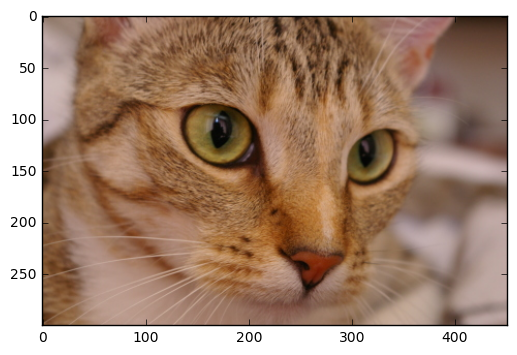

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure
from skimage import data

%matplotlib inline

cat = data.chelsea()
plt.imshow(cat)
cat.shape # cat is a 300-by-451 pixel image with three channels (red, green, and blue)

That's a nice kitty picture! Notice the out-of-the-focus background (bo-keh!!).The first thing we are going to do is to remove complexity converting the image to black and white. There are different [ways to do that](http://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/), but let's use the one by default in scikit-image that [preserves luminosity](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray)

(300, 451)

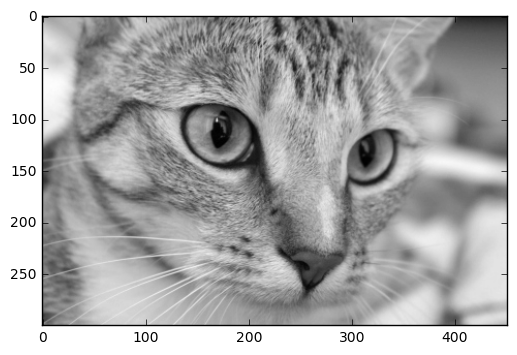

In [2]:
from skimage.color import rgb2gray
cat_gray = rgb2gray(cat)
plt.imshow(cat_gray, cmap=plt.cm.gray)
cat_gray.shape 

Alright! Now we are ready to detect the sharpness of the picture calculating the gradient of the image:

C:\Users\cacheme\Miniconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


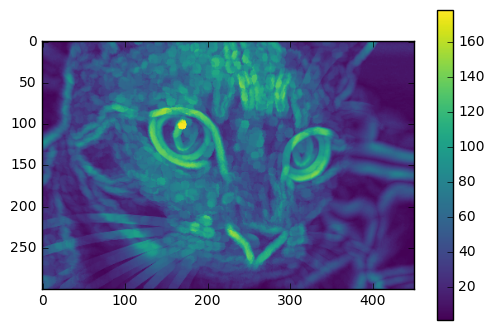

In [3]:
#https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/rank/generic.py#L279

from skimage.morphology import disk
from skimage.filters.rank import gradient, gradient_percentile

selection_element = disk(5) # matrix of n pixels with a disk shape

cat_sharpness = gradient(cat_gray, selection_element)
plt.imshow(cat_sharpness, cmap="viridis")
plt.colorbar()
plt.show()

That's cool, now whe have a quantitative number that measures the sharpness. So if we compute the gradient selecting more pixels we might obtain a scalable non-detail map where we can apply more blur (bokeh!)

C:\Users\cacheme\Miniconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


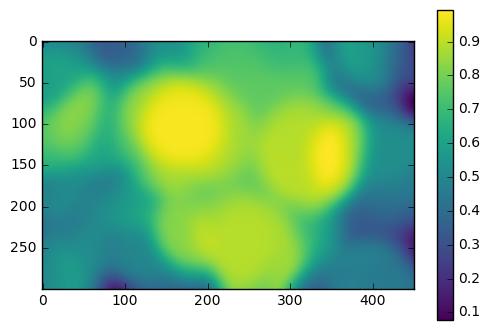

In [30]:
from skimage.filters import gaussian

selection_element = disk(50) # matrix of n pixels with a disk shape

cat_sharpness = gradient(cat_gray, selection_element)

cat_sharpness_std = (cat_sharpness - cat_sharpness.min())/(cat_sharpness.max()-cat_sharpness.min())

# (optional) Removes sharp edges of disk
cat_sharpness_std = gaussian(cat_sharpness_std, sigma=10)

plt.imshow(cat_sharpness_std, cmap="viridis")
plt.colorbar()
plt.show()

We are close to the _grand finale_. Let's apply a [gaussian blur filter](http://scikit-image.org/docs/0.12.x/api/skimage.filters.html#skimage.filters.gaussian) now to see what happens:

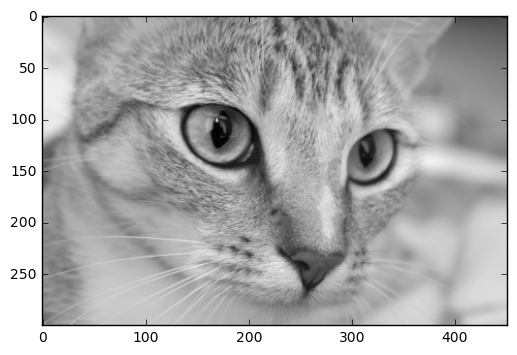

In [39]:
from skimage.filters import gaussian

filtered_cat_gray = gaussian(cat_gray, sigma=50)

cat_final_gray = cat_gray*cat_sharpness_std + filtered_cat_gray*(1-cat_sharpness_std)
plt.imshow(cat_final_gray, cmap="gray")
plt.show()

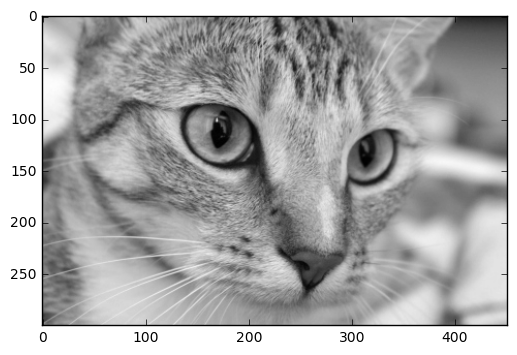

In [38]:
plt.imshow(cat_gray, cmap="gray")
plt.show()

In [43]:
from skimage.filters import gaussian

filtered_cat = gaussian(cat, sigma=50, multichannel=True)
cat_sharpness_std_color = np.tile(cat_sharpness_std, 3)

cat_final = cat*cat_sharpness_std_color + filtered_cat*(1-cat_sharpness_std_color)
plt.imshow(cat_final, cmap="gray")
plt.show()

ValueError: operands could not be broadcast together with shapes (300,451,3) (300,1353) 

In [51]:
cat_sharpness_std_color = np.broadcast_to(cat_sharpness_std, 3)
cat_sharpness_std_color.shape

ValueError: input operand has more dimensions than allowed by the axis remapping

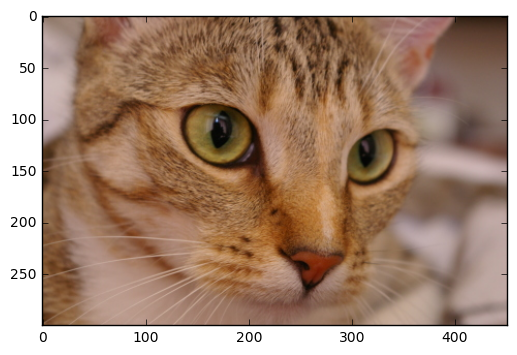

In [52]:
plt.imshow(cat)
plt.show()

In [6]:
# TODO how to convolve by a non uniform disk instead of using Gaussian filter
# the former produces sharp circles around highlights whereas the latter is a much softer and fake effect